<a href="https://colab.research.google.com/github/akashcx/Deep-Learning-Projects/blob/main/Housing%20Price%20Prediction/Housing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [ ]:
df = pd.read_csv('Housing Prices.csv')

In [ ]:
df.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,0
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,1
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,0
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,0
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,1


In [ ]:
df.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04,10000.000000
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06,0.126500
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06,0.332429
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04,0.000000
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06,0.000000
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06,0.000000
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06,0.000000
max,99999.00000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

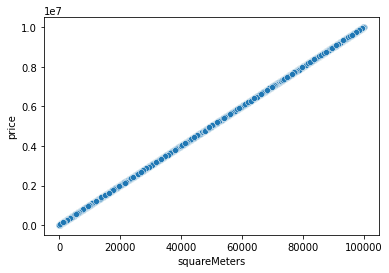

In [ ]:
sns.scatterplot(x='squareMeters',y='price',data=df)

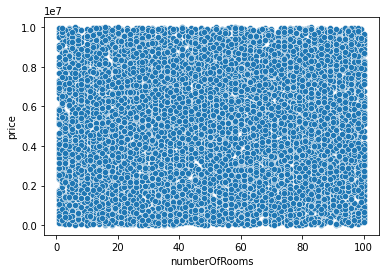

In [ ]:
sns.scatterplot(x='numberOfRooms',y='price',data=df)

In [ ]:
X = df.drop('price',axis=1)
y = df['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = Sequential()

model.add(Dense(17,activation='relu'))
model.add(Dense(1000,activation='relu'))
model.add(Dense(1000,activation='relu'))
model.add(Dense(1000,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [ ]:
model.fit(x=X_train,y=y_train.values,
      validation_data=(X_test,y_test.values),batch_size=100, epochs=1000)

Epoch 1/1000
80/80 [==============================] - 3s 10ms/step - loss: 31690976133120.0000 - val_loss: 23065928925184.0000
Epoch 2/1000
80/80 [==============================] - 1s 8ms/step - loss: 9584357933056.0000 - val_loss: 7385930792960.0000
Epoch 3/1000
80/80 [==============================] - 0s 5ms/step - loss: 6969462095872.0000 - val_loss: 6507571183616.0000
Epoch 4/1000
80/80 [==============================] - 0s 5ms/step - loss: 6007366352896.0000 - val_loss: 5389864665088.0000
Epoch 5/1000
80/80 [==============================] - 0s 5ms/step - loss: 4592154181632.0000 - val_loss: 3602096848896.0000
Epoch 6/1000
80/80 [==============================] - 0s 5ms/step - loss: 2401571962880.0000 - val_loss: 1203114344448.0000
Epoch 7/1000
80/80 [==============================] - 0s 6ms/step - loss: 595787710464.0000 - val_loss: 252827107328.0000
Epoch 8/1000
80/80 [==============================] - 0s 6ms/step - loss: 176437755904.0000 - val_loss: 120805761024.0000
Epoch 9/1

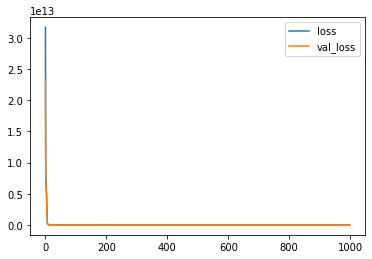

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [ ]:
pred = model.predict(X_test)

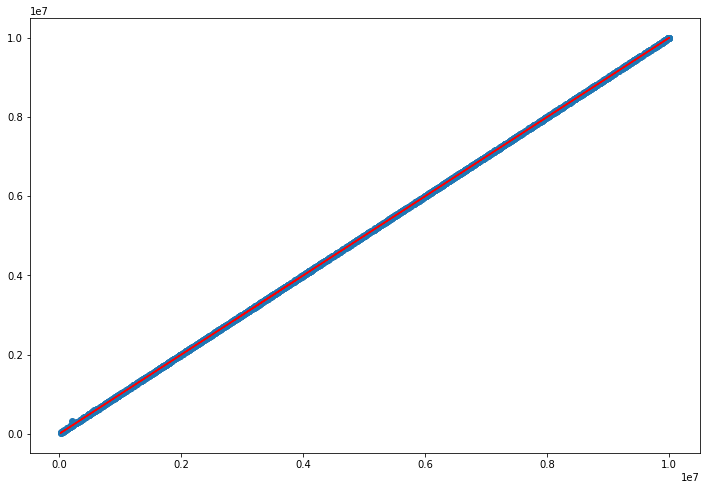

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(y_test,pred)
plt.plot(y_test,y_test,'r') 

In [ ]:
y_pred=[]
for i in pred:
    for j in i:
        y_pred.append(j)


nlist=[]
for i in 100-(abs(y_test-y_pred)/y_test)*100:
    nlist.append(i)

print("Accuracy:")
print(np.average(nlist))

Accuracy:
99.84289043960563


In [ ]:
model.save('housing_prices.h5')